| | | | |
|-|-|-|-|
|S|F|F|F|
|F|H|F|H|
|F|F|F|H|
|H|F|F|G|

In [8]:
import numpy as np
import gym
import time
from IPython.display import clear_output
import matplotlib.pyplot as plt

In [9]:
seed = 1234
np.random.seed(seed)
NUM_EPISODES = 10000
STEPS_PER_EPISODE = 100
LR = 0.4

In [10]:
env = gym.make("FrozenLake-v0")

In [11]:
action_space_size = env.action_space.n
state_space_size = env.observation_space.n

### SARSA

In [12]:
q_table = np.zeros((state_space_size, action_space_size))
print(q_table)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [13]:
num_episodes = NUM_EPISODES
max_steps_per_episode = STEPS_PER_EPISODE

learning_rate = LR
discount_rate = 0.99

exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.01
exploration_decay_rate = 0.01

rewards_all_episodes = []

In [14]:
for episode in range(num_episodes):
    state = env.reset()
    exploration_rate_threshold = np.random.uniform(0, 1)
    if exploration_rate_threshold > exploration_rate:
        action = np.argmax(q_table[state, :])
    else:
        action = env.action_space.sample()
    done = False
    rewards_current_episode = 0
    while not done:
        next_state, reward, done, info = env.step(action)
        exploration_rate_threshold = np.random.uniform(0, 1)
        if exploration_rate_threshold > exploration_rate:
            next_action = np.argmax(q_table[next_state, :])
        else:
            next_action = env.action_space.sample()
        q_table[state, action] = q_table[state, action] + learning_rate*(reward + discount_rate*q_table[next_state, next_action] - q_table[state, action])
        rewards_current_episode = rewards_current_episode + reward
        if done:
            break
        state, action = next_state, next_action
    exploration_rate = min_exploration_rate + (max_exploration_rate - min_exploration_rate)*np.exp(-exploration_decay_rate*episode)
    rewards_all_episodes.append(rewards_current_episode)
    if (episode+1) % 100 == 0:
        print("Running average of episodes {}-{}: {}".format(episode-98,episode+1,np.mean(rewards_all_episodes[-100:])))
# Calculate and print the average reward per thousand episodes
rewards_per_thosand_episodes = np.split(np.array(rewards_all_episodes),num_episodes/1000)
count = 1000

print("********Average reward per thousand episodes********\n")
episode_steps, reward_steps = [], []
for r in rewards_per_thosand_episodes:
#     print(count, ": ", str(sum(r/1000)))
    episode_steps.append(count)
    reward_steps.append(sum(r/1000))
    count += 1000

Running average of episodes 1-100: 0.01
Running average of episodes 101-200: 0.04
Running average of episodes 201-300: 0.05
Running average of episodes 301-400: 0.26
Running average of episodes 401-500: 0.31
Running average of episodes 501-600: 0.47
Running average of episodes 601-700: 0.58
Running average of episodes 701-800: 0.57
Running average of episodes 801-900: 0.74
Running average of episodes 901-1000: 0.56
Running average of episodes 1001-1100: 0.68
Running average of episodes 1101-1200: 0.67
Running average of episodes 1201-1300: 0.66
Running average of episodes 1301-1400: 0.65
Running average of episodes 1401-1500: 0.52
Running average of episodes 1501-1600: 0.43
Running average of episodes 1601-1700: 0.45
Running average of episodes 1701-1800: 0.54
Running average of episodes 1801-1900: 0.64
Running average of episodes 1901-2000: 0.74
Running average of episodes 2001-2100: 0.71
Running average of episodes 2101-2200: 0.67
Running average of episodes 2201-2300: 0.58
Running a

In [15]:
print(rewards_all_episodes[-10:])
print(exploration_rate)

[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0]
0.01


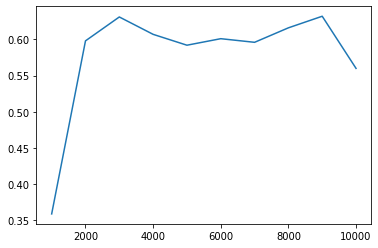

In [16]:
plt.plot(episode_steps, reward_steps)

In [17]:
# Print updated Q-table
print("\n\n********Q-table********\n")
print(q_table)



********Q-table********

[[0.46913008 0.34606828 0.44521944 0.37421482]
 [0.17139858 0.10764296 0.20210832 0.46966727]
 [0.24497169 0.20025947 0.25034379 0.40682374]
 [0.23456189 0.17064975 0.14947419 0.35162542]
 [0.49606213 0.35387334 0.17318465 0.3347752 ]
 [0.         0.         0.         0.        ]
 [0.02180803 0.0100971  0.2280241  0.02473127]
 [0.         0.         0.         0.        ]
 [0.21552075 0.21505401 0.24295256 0.57613641]
 [0.2879654  0.70541255 0.2996116  0.42317482]
 [0.49070301 0.11148765 0.05410159 0.15692666]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.19367207 0.25495964 0.84596359 0.40188096]
 [0.42704518 0.96712245 0.45429982 0.5037762 ]
 [0.         0.         0.         0.        ]]


### Q-Learning

In [23]:
np.random.seed(seed)

In [24]:
q_table = np.zeros((state_space_size, action_space_size))
print(q_table)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [25]:
num_episodes = NUM_EPISODES
max_steps_per_episode = STEPS_PER_EPISODE
learning_rate = LR
discount_rate = 0.99

exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.001
exploration_decay_rate = 0.01

In [26]:
rewards_all_episodes = []

In [27]:
for episode in range(num_episodes):
    state = env.reset()
    done = False
    rewards_current_episode = 0

    for step in range(max_steps_per_episode): 

        # Exploration-exploitation trade-off
        exploration_rate_threshold = np.random.uniform(0, 1)
        if exploration_rate_threshold > exploration_rate:
            action = np.argmax(q_table[state,:]) 
        else:
            action = env.action_space.sample()
        new_state, reward, done, info = env.step(action)
        q_table[state, action] = q_table[state, action] * (1 - learning_rate) + \
        learning_rate * (reward + discount_rate * np.max(q_table[new_state, :]))
        state = new_state
        rewards_current_episode += reward 
        if done == True: 
            break
    exploration_rate = min_exploration_rate + (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episode)
    rewards_all_episodes.append(rewards_current_episode)
    if (episode+1) % 100 == 0:
        print("Running average of episodes {}-{}: {}".format(episode-98,episode+1,np.mean(rewards_all_episodes[-100:])))

# Calculate and print the average reward per thousand episodes
rewards_per_thosand_episodes = np.split(np.array(rewards_all_episodes),num_episodes/1000)
count = 1000

print("********Plot Average reward per thousand episodes********\n")
episode_steps, reward_steps = [], []
for r in rewards_per_thosand_episodes:
#     print(count, ": ", str(sum(r/1000)))
    episode_steps.append(count)
    reward_steps.append(sum(r/1000))
    count += 1000

Running average of episodes 1-100: 0.05
Running average of episodes 101-200: 0.16
Running average of episodes 201-300: 0.41
Running average of episodes 301-400: 0.6
Running average of episodes 401-500: 0.71
Running average of episodes 501-600: 0.51
Running average of episodes 601-700: 0.73
Running average of episodes 701-800: 0.66
Running average of episodes 801-900: 0.76
Running average of episodes 901-1000: 0.75
Running average of episodes 1001-1100: 0.72
Running average of episodes 1101-1200: 0.63
Running average of episodes 1201-1300: 0.71
Running average of episodes 1301-1400: 0.68
Running average of episodes 1401-1500: 0.75
Running average of episodes 1501-1600: 0.73
Running average of episodes 1601-1700: 0.74
Running average of episodes 1701-1800: 0.74
Running average of episodes 1801-1900: 0.61
Running average of episodes 1901-2000: 0.56
Running average of episodes 2001-2100: 0.69
Running average of episodes 2101-2200: 0.71
Running average of episodes 2201-2300: 0.74
Running av

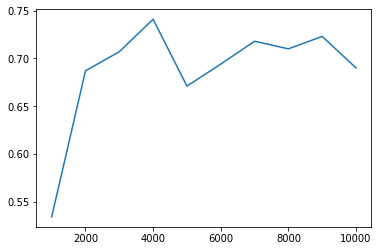

In [28]:
plt.plot(episode_steps, reward_steps)

In [29]:
print(rewards_all_episodes[-10:])
print(exploration_rate)

[1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0]
0.001


In [30]:
# Print updated Q-table
print("\n\n********Q-table********\n")
print(q_table)



********Q-table********

[[0.49625159 0.34947347 0.30842623 0.3454806 ]
 [0.09952326 0.182467   0.09343261 0.47204438]
 [0.25154794 0.06489636 0.14956516 0.04748864]
 [0.01602401 0.00795698 0.00315097 0.00624169]
 [0.51161644 0.13447627 0.22784654 0.23579358]
 [0.         0.         0.         0.        ]
 [0.0099429  0.00918508 0.35170219 0.00806542]
 [0.         0.         0.         0.        ]
 [0.09347251 0.40339509 0.07890132 0.54534762]
 [0.17907502 0.61630765 0.12723219 0.13207955]
 [0.51487662 0.0284117  0.08912209 0.06598001]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.12326569 0.41930235 0.66654923 0.2977561 ]
 [0.54835348 0.80767184 0.50323505 0.47346142]
 [0.         0.         0.         0.        ]]


In [ ]:
def play():
    for episode in range(3):
        state = env.reset()
        done = False
        print("*****EPISODE ", episode+1, "*****\n\n\n\n")
        time.sleep(1)
        for step in range(max_steps_per_episode):        
            clear_output(wait=True)
            env.render()
            time.sleep(0.3)
            action = np.argmax(q_table[state,:])        
            new_state, reward, done, info = env.step(action)
            if done:
                clear_output(wait=True)
                env.render()
                if reward == 1:
                    print("****You reached the goal!****")
                    time.sleep(3)
                else:
                    print("****You fell through a hole!****")
                    time.sleep(3)
                    clear_output(wait=True)
                break
            state = new_state
        env.close()

### Expected SARSA

In [66]:
np.random.seed(seed)

q_table = np.zeros((state_space_size, action_space_size))
print(q_table)

num_episodes = NUM_EPISODES
max_steps_per_episode = STEPS_PER_EPISODE

learning_rate = LR
discount_rate = 0.99

exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.001
exploration_decay_rate = 0.01

rewards_all_episodes = []

for episode in range(num_episodes):
    state = env.reset()
    exploration_rate_threshold = np.random.uniform(0, 1)
    if exploration_rate_threshold > exploration_rate:
        action = np.argmax(q_table[state, :])
    else:
        action = env.action_space.sample()
    done = False
    rewards_current_episode = 0
    for step in range(max_steps_per_episode):
        next_state, reward, done, info = env.step(action)
        exploration_rate_threshold = np.random.uniform(0, 1)
        if exploration_rate_threshold > exploration_rate:
            next_action = np.argmax(q_table[next_state, :])
        else:
            next_action = env.action_space.sample()
        q_table[state, action] = q_table[state, action] + \
        learning_rate*(reward + discount_rate*np.mean(q_table[next_state, :]) - q_table[state, action])
        rewards_current_episode = rewards_current_episode + reward
        if done:
            break
        state, action = next_state, next_action
    exploration_rate = min_exploration_rate + \
    (max_exploration_rate - min_exploration_rate)*np.exp(-exploration_decay_rate*episode)
    rewards_all_episodes.append(rewards_current_episode)
    if (episode+1) % 100 == 0:
        print("Running average of episodes {}-{}: {}".format(episode-98,episode+1,np.mean(rewards_all_episodes[-100:])))

# Calculate and print the average reward per thousand episodes
rewards_per_thosand_episodes = np.split(np.array(rewards_all_episodes),num_episodes/1000)
count = 1000

print("********Plot Average reward per thousand episodes********\n")
episode_steps, reward_steps = [], []
for r in rewards_per_thosand_episodes:
#     print(count, ": ", str(sum(r/1000)))
    episode_steps.append(count)
    reward_steps.append(sum(r/1000))
    count += 1000

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Running average of episodes 1-100: 0.01
Running average of episodes 101-200: 0.04
Running average of episodes 201-300: 0.06
Running average of episodes 301-400: 0.08
Running average of episodes 401-500: 0.1
Running average of episodes 501-600: 0.11
Running average of episodes 601-700: 0.19
Running average of episodes 701-800: 0.04
Running average of episodes 801-900: 0.1
Running average of episodes 901-1000: 0.09
Running average of episodes 1001-1100: 0.14
Running average of episodes 1101-1200: 0.17
Running average of episodes 1201-1300: 0.12
Running average of episodes 1301-1400: 0.18
Running average of episodes 1401-1500: 0.2
Running average of episodes 1501-1600: 0.22
Running average of episodes 1601-1700: 0.22
Running average of episodes 1701-18

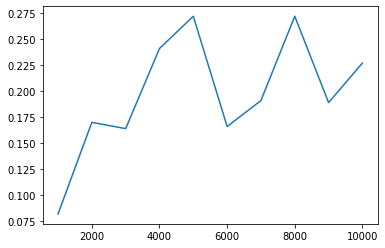

In [67]:
plt.plot(episode_steps, reward_steps)

In [68]:
print(rewards_all_episodes[-10:])
print(exploration_rate)

[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]
0.001


In [69]:
# Print updated Q-table
print("\n\n********Q-table********\n")
print(q_table)



********Q-table********

[[2.26150996e-05 7.14904832e-07 9.85250107e-07 6.78483603e-07]
 [2.63694423e-07 6.05113177e-07 2.82867660e-07 3.04217883e-06]
 [3.99798843e-04 6.41698012e-07 5.85334101e-07 4.28473088e-07]
 [1.75626148e-10 3.89100838e-07 1.39390449e-10 0.00000000e+00]
 [1.27526061e-04 7.96667239e-07 6.71225798e-07 9.52525180e-07]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.37697368e-06 3.97249554e-06 1.99661521e-03 1.50081874e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.27275388e-06 1.99420410e-06 1.23705646e-03 4.39431416e-06]
 [3.76053664e-05 8.00978047e-03 1.96815385e-04 1.53260257e-04]
 [1.34455840e-02 2.32246483e-04 2.10061892e-04 2.38739023e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.67537356e-04 4.47016278e-02 6.05394591e-04 5.31478699e-04]
 [5.30566525e-03 5.46030540e-03 6.07608883e-01 4.54526873e-03]
 [0.00000000e+00 0.00000000e

### Double Q-Learning

In [139]:
np.random.seed(seed)
q1_table = np.zeros((state_space_size, action_space_size))
q2_table = np.zeros((state_space_size, action_space_size))

num_episodes = NUM_EPISODES
max_steps_per_episode = STEPS_PER_EPISODE

learning_rate = LR
discount_rate = 0.99

exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.001
exploration_decay_rate = 0.01

rewards_all_episodes = []

for episode in range(num_episodes):
    state = env.reset()
    done = False
    rewards_current_episode = 0

    for step in range(max_steps_per_episode): 

        # Exploration-exploitation trade-off
        exploration_rate_threshold = np.random.uniform(0, 1)
        if exploration_rate_threshold > exploration_rate:
            action = np.argmax(q1_table[state,:] + q2_table[state,:]) 
        else:
            action = env.action_space.sample()
        new_state, reward, done, info = env.step(action)
        if np.random.uniform(0, 1) > 0.5:
            q1_table[state, action] = q1_table[state, action] * (1 - learning_rate) + \
            learning_rate * (reward + discount_rate * q2_table[new_state, np.argmax(q1_table[new_state, :])])
        else:
            q2_table[state, action] = q2_table[state, action] * (1 - learning_rate) + \
            learning_rate * (reward + discount_rate * q1_table[new_state, np.argmax(q2_table[new_state, :])])
        state = new_state
        rewards_current_episode += reward 
        if done == True: 
            break
    exploration_rate = min_exploration_rate + \
    (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episode)
    rewards_all_episodes.append(rewards_current_episode)
    if (episode+1) % 100 == 0:
        print("Running average of episodes {}-{}: {}".format(episode-98,episode+1,np.mean(rewards_all_episodes[-100:])))

# Calculate and print the average reward per thousand episodes
rewards_per_thosand_episodes = np.split(np.array(rewards_all_episodes),num_episodes/1000)
count = 1000

print("********Plot Average reward per thousand episodes********\n")
episode_steps, reward_steps = [], []
for r in rewards_per_thosand_episodes:
#     print(count, ": ", str(sum(r/1000)))
    episode_steps.append(count)
    reward_steps.append(sum(r/1000))
    count += 1000

Running average of episodes 1-100: 0.02
Running average of episodes 101-200: 0.0
Running average of episodes 201-300: 0.01
Running average of episodes 301-400: 0.12
Running average of episodes 401-500: 0.03
Running average of episodes 501-600: 0.07
Running average of episodes 601-700: 0.09
Running average of episodes 701-800: 0.04
Running average of episodes 801-900: 0.12
Running average of episodes 901-1000: 0.18
Running average of episodes 1001-1100: 0.34
Running average of episodes 1101-1200: 0.21
Running average of episodes 1201-1300: 0.25
Running average of episodes 1301-1400: 0.24
Running average of episodes 1401-1500: 0.09
Running average of episodes 1501-1600: 0.13
Running average of episodes 1601-1700: 0.08
Running average of episodes 1701-1800: 0.18
Running average of episodes 1801-1900: 0.09
Running average of episodes 1901-2000: 0.17
Running average of episodes 2001-2100: 0.11
Running average of episodes 2101-2200: 0.08
Running average of episodes 2201-2300: 0.28
Running av

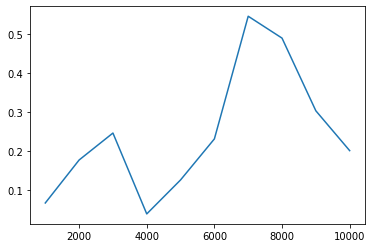

In [140]:
plt.plot(episode_steps, reward_steps)

In [94]:
print(rewards_all_episodes[-10:])
print(exploration_rate)

[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
0.001


In [95]:
# Print updated Q-table
print("\n\n********Q-table********\n")
print(q1_table)
print(q2_table)



********Q-table********

[[1.44376409e-01 5.48520200e-02 4.66112898e-03 5.86170553e-03]
 [5.25317291e-03 7.23437790e-03 3.03343456e-03 4.33419387e-02]
 [7.76975307e-03 7.68403771e-02 1.80626701e-02 3.80302147e-03]
 [1.82548074e-02 0.00000000e+00 5.67310308e-04 4.30485090e-03]
 [9.62186652e-03 3.71194980e-02 8.11480214e-03 7.37483141e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.17765391e-02 8.78263465e-03 2.32042970e-01 1.91793842e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.82489935e-03 1.29408343e-02 1.15637341e-02 4.40553266e-01]
 [4.63554314e-02 4.23314763e-01 7.84771438e-02 2.90113136e-02]
 [5.59866841e-01 2.31175788e-01 7.06264055e-02 1.21733594e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 9.28137007e-02 6.91199746e-01 1.34698222e-01]
 [4.37944995e-01 6.17672816e-01 2.40665915e-01 2.86249279e-01]
 [0.00000000e+00 0.00000000e

### On-policy first-visit MC control (for epsilon-soft policies), estimates policy

In [96]:
import itertools

In [115]:
np.random.seed(seed)

q_table = np.zeros((state_space_size, action_space_size))
returns = {(s,a):[] for (s,a) in itertools.product(range(env.observation_space.n), range(env.action_space.n))}

print(q_table)

num_episodes = NUM_EPISODES
max_steps_per_episode = STEPS_PER_EPISODE

learning_rate = LR
discount_rate = 0.99

exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.001
exploration_decay_rate = 0.01

def policy(s, q):
    exploration_rate_threshold = np.random.uniform(0,1)
    if exploration_rate_threshold > exploration_rate:
        action = np.argmax(q[s,:])
    else:
        action = env.action_space.sample()
    return action


rewards_all_episodes = []

for episode in range(num_episodes):
    done = False
    episode_states_actions, episode_rewards = [], []
    G = 0
    rewards_current_episode = 0
    state = env.reset()
    action = policy(state, q_table)
    while not done:
        episode_states_actions.append((state,action))
        new_state, reward, done, info = env.step(action)
        episode_rewards.append(reward)
        state = new_state
        action = policy(state, q_table)
        rewards_current_episode += reward
    
    for step in range(len(episode_states_actions)-1, -1, -1):
        G = reward + discount_rate*G
        if episode_states_actions[step] not in episode_states_actions[:step]:
            returns[episode_states_actions[step]].append(G)
            q_table[episode_states_actions[step][0], episode_states_actions[step][1]] = \
            np.mean(returns[episode_states_actions[step]])
    exploration_rate = min_exploration_rate + \
    (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episode)
    rewards_all_episodes.append(rewards_current_episode)
    if (episode+1) % 100 == 0:
        print("Running average of episodes {}-{}: {}".format(episode-98,episode+1,np.mean(rewards_all_episodes[-100:])))

# Calculate and print the average reward per thousand episodes
rewards_per_thosand_episodes = np.split(np.array(rewards_all_episodes),num_episodes/1000)
count = 1000

print("********Plot Average reward per thousand episodes********\n")
episode_steps, reward_steps = [], []
for r in rewards_per_thosand_episodes:
#     print(count, ": ", str(sum(r/1000)))
    episode_steps.append(count)
    reward_steps.append(sum(r/1000))
    count += 1000

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Running average of episodes 1-100: 0.06
Running average of episodes 101-200: 0.19
Running average of episodes 201-300: 0.33
Running average of episodes 301-400: 0.61
Running average of episodes 401-500: 0.78
Running average of episodes 501-600: 0.65
Running average of episodes 601-700: 0.64
Running average of episodes 701-800: 0.78
Running average of episodes 801-900: 0.78
Running average of episodes 901-1000: 0.71
Running average of episodes 1001-1100: 0.7
Running average of episodes 1101-1200: 0.66
Running average of episodes 1201-1300: 0.74
Running average of episodes 1301-1400: 0.74
Running average of episodes 1401-1500: 0.77
Running average of episodes 1501-1600: 0.76
Running average of episodes 1601-1700: 0.75
Running average of episodes 1701-

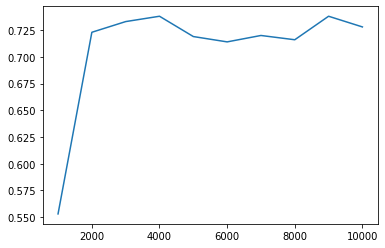

In [116]:
plt.plot(episode_steps, reward_steps)

In [117]:
print(rewards_all_episodes[-10:])
print(exploration_rate)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0]
0.001


In [118]:
# Print updated Q-table
print("\n\n********Q-table********\n")
print(q_table)



********Q-table********

[[21.08145475  7.51458538  6.76828061  8.02369   ]
 [ 0.92570329  0.14414691  0.70846218 11.95942276]
 [ 9.77759002  1.55275457  1.29017218  2.68234577]
 [ 0.74271114  0.          0.          0.        ]
 [19.62209095  6.54190603  4.27509783  7.86251194]
 [ 0.          0.          0.          0.        ]
 [ 6.39113676  0.          0.54001818  0.        ]
 [ 0.          0.          0.          0.        ]
 [ 6.38304736 10.18950367  6.10368132 16.64625253]
 [ 4.15433133 12.37772394  2.6440256   4.691184  ]
 [ 8.68180979  2.08926798  1.04442428  6.35109924]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 4.07212677  2.19476531  9.80931001  5.5702493 ]
 [ 4.69424987  6.05098364  2.76676424  3.27551461]
 [ 0.          0.          0.          0.        ]]


In [ ]:
import gym
import numpy as np

# This is a straightforwad implementation of SARSA for the FrozenLake OpenAI
# Gym testbed. I wrote it mostly to make myself familiar with the OpenAI gym;
# the SARSA algorithm was implemented pretty much from the Wikipedia page alone.

env = gym.make("FrozenLake-v0")

def choose_action(observation):
    return np.argmax(q_table[observation])

alpha = 0.4
gamma = 0.999

q_table = dict([(x, [1, 1, 1, 1]) for x in range(16)])
score = []

for i in range(10000):
    observation = env.reset()
    action = choose_action(observation)

    prev_observation = None
    prev_action      = None

    t = 0

    for t in range(2500):
        observation, reward, done, info = env.step(action)

        action = choose_action(observation)

        if not prev_observation is None:
            q_old = q_table[prev_observation][prev_action]
            q_new = q_old
            if done:
                q_new += alpha * (reward - q_old)
            else:
                q_new += alpha * (reward + gamma * q_table[observation][action] - q_old)

            new_table = q_table[prev_observation]
            new_table[prev_action] = q_new
            q_table[prev_observation] = new_table

        prev_observation = observation
        prev_action = action

        if done:
            if len(score) < 100:
                score.append(reward)
            else:
                score[i % 100] = reward

            print("Episode {} finished after {} timesteps with r={}. Running score: {}".format(i, t, reward, np.mean(score)))
            break